# Módulo 6 Actividad 2

## Intención del aprendizaje esperado:

2. Elaborar un modelo predictivo aplicando el algoritmo K-Means utilizando lenguaje Python para resolver un problema de clusterización.


## Ejercicios Planteados


*Clasificación de Clientes según su personalidad.*

**Luego de haber cerrado su cápsula de aprendizaje de clasificación, se le ha determinado que averigüe los intereses que pueden tener los clientes de la empresa KEPPLER, esto es necesario, para que se entregue la información al departamento de marketing y puedan realizar campañas fidelizada a sus clientes.**
**En el archivo clientes.cvs encontrará el registro de cada uno de ellos, además el archivo contiene 9 categorías -actividades laborales- que son:**

● Actor/actriz

● Cantante

● Modelo

● Tv, series

● Radio

● Tecnología

● Deportes

● Política

● Escritor

**1. Realice un resumen estadístico de sus datos.**

usuario (el nombre en Twitter)

“op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte

“co” =Conscientiousness – grado de orden, prolijidad, organización

“ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social

“ag” = Agreeableness – grado de empatía con los demás, temperamento

“ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.

Wordcount – Cantidad promedio de palabras usadas en sus tweets

Categoria – Actividad laboral del usuario (actor, cantante, etc.)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

clientes = pd.read_csv('clientes.csv')

print(clientes.size)
print('\n' + '=' * 80)
clientes.info()
print('\n' + '=' * 80)
print(clientes.describe())
print('\n' + '=' * 80)
print(clientes['categoria'].value_counts())




1120

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB

               op          co          ex          ag          ne   wordcount  \
count  140.000000  140.000000  140.000000  140.000000  140.000000  140.000000   
mean    44.414591   22.977135   40.764428   22.918528    8.000098   98.715484   
std      8.425723    5.816851    7.185246    7.657122    3.039248   44.714071   
min     30.020465    7.852756   18.693542    9.305985    1.030213    5.020800   
25%     38.206484   19

**2. Entregue gráficos que acompañen los hallazgos encontrados en el punto 1.**

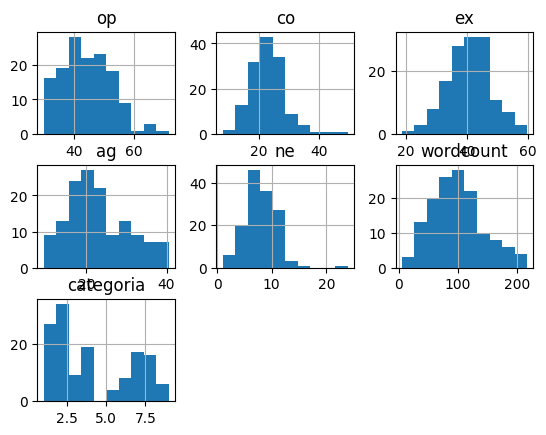

In [20]:
clientes.hist()
plt.show()


EL análisis exploratorio no nos permite obtener ninguna información que nos dé indicios de algún patrón de comportamiento.  Las métricas de las variables son desbalanceadas por lo que se supone que no están estandarizadas pero tampoco se puede asegurar.  Vemos en los gráficos que la distribucuón pareciera no marcar tendencia segura en algo tampoco ya que muchos de los gráficos muestran comportamientos diferentes a la distribución normal o desbalanceados.

**3. Encuentre una relación o grafique las variables: op, ex y ag, además de las categorías.**
